# Utilitzing Meteorological Data with Supervised Learning to Predict Snowfall at Ski Resort
**By Dustin Rapp**  
**for partial fulfillment of requirements for Springboard's Certificate in Intermediate Data Science: Python**

--  
--  

## Introduction
***
Complex terrain in mountainous areas often make predicting snowfall difficult with prognostic weather models - especially on specific slopes or mountainsides where extremely localized air flows may complicate such forecasts.  With accurate snow forecasts, ski resorts can optimize their snowfall making, grooming, and snow removal operations if given advance notice. An accurate snowfall forecast, even for a small segment of the mountain may assist a ski resort's operation.  The goal of this study is to get a glimpse into the potential of utilizing a ordinary linear systems model with freely available surface and meteorological data to predict snowfall on a slope at Copper Mountain Ski Resort in Colorado.  A map showing the Copper Mountain SNOTEL site and the meteorological sites used in this assessment is shown in **Figure 1**  
  
**Insert Figure 1 - Map of Locations**  
  

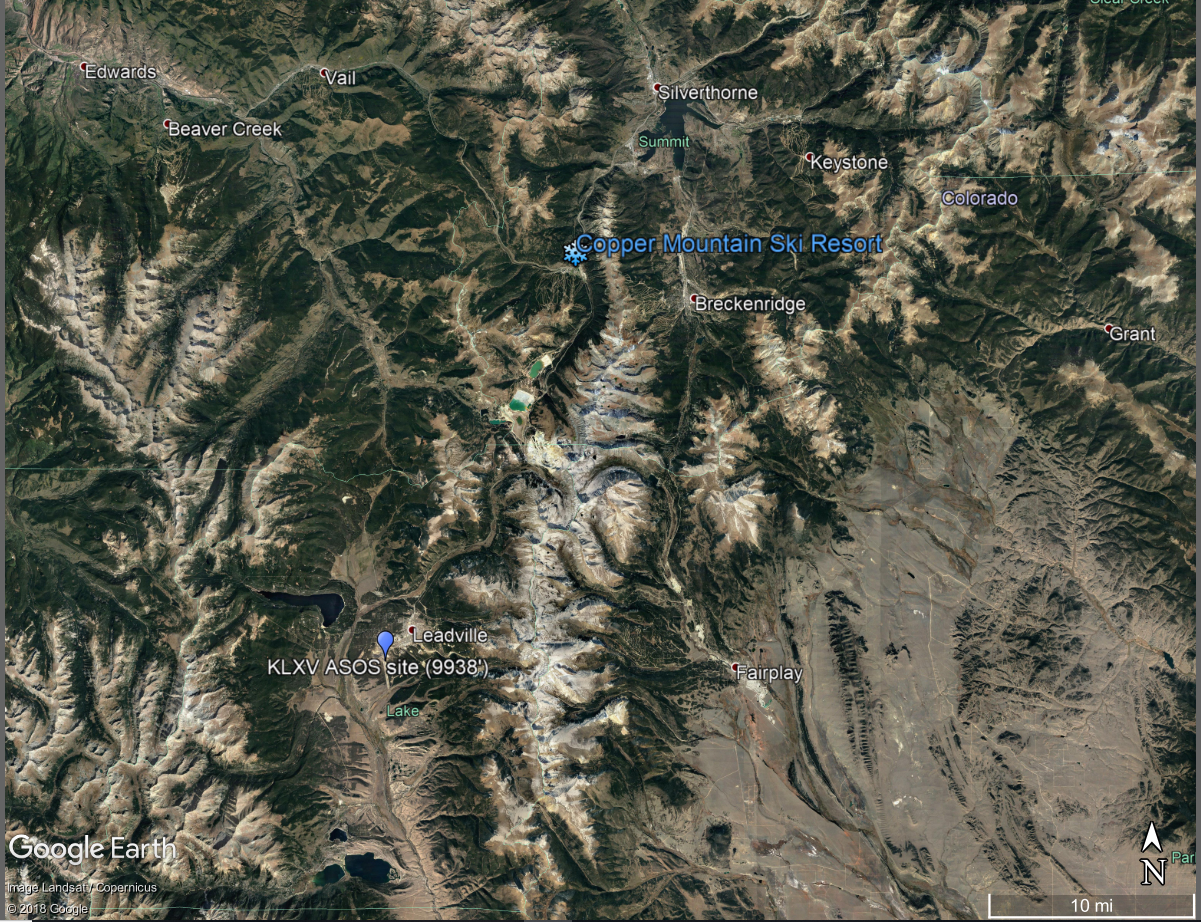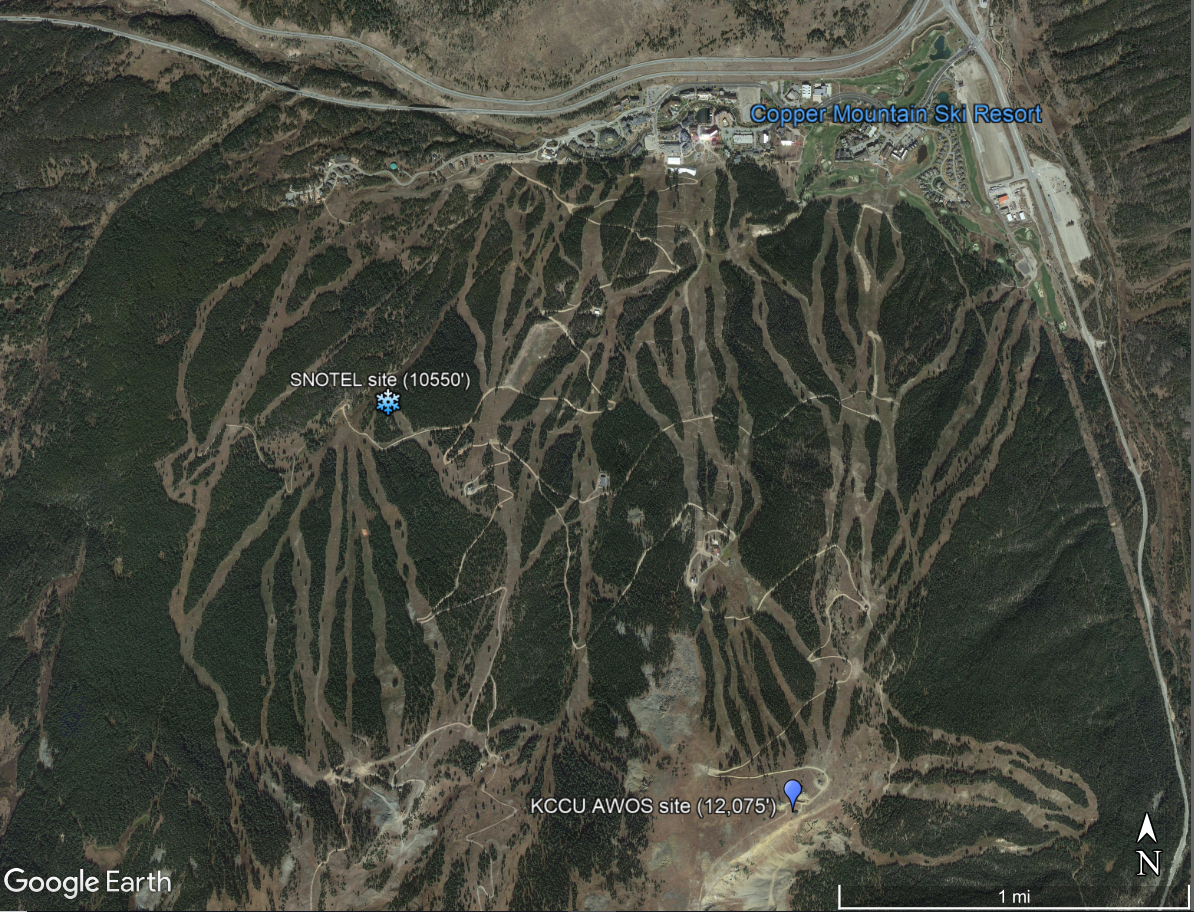


## Data
The Copper Mountain ski resort is unique as there is an official SNOTEL National Resources Conservation Services  station  the east slope of Copper Mountain, where many popular ski runs are located. SNOTEL is an telemtry automated system of snowpack and related climate sensors in the Western United States. In addition to reporting hourly snowfall amounts, it also records temperature.  The Copper Mountain ski resort is also unique it that it has an official Automated Weather Observing System (AWOS) which monitors a suite of hourly variables near the top of Copper Mountain.  Additionaly, a National Weather Services Automated Surface Observing Station (ASOS) is located in Leadville, CO approximately 30 km to the northwest of Copper Mountain.  These threee stations give a comprehensive meteorological dataset of surface variables.   Table 1-1 gives a listing of all surface level meteorological variables by station.


## Data Wrangling and Cleaning

Hourly data for each station was downloaded for years 2005-2017 for each station. Data Capture for each snow season is found in **Table 1**. Data sources for each station are found in **Table 2**.  Hourly surface data from each station was organized into timeseries dataframes with UTM timestamps an inspected. Any anomalous readings were discarded.  Missing data up to three hours was interpolated.  Due to the sensitivity of the SNOTEL snow depth measurement to extrenal forces (e.g. debris, air pressure), snow depth data from the SNOTEL site appeared noisy for smaller snowstorms (i.e. less then 3 inches). To minimize the small scale pertubations, 12 hour snowfall totals were estimated at 00:00 UTC and 12:00 UTC and only 12-hr snowfall events where greater then or equal to 3 inches occurred were utilized.

<font size="+10">Description</font>  

shareimprove this answer

**Table 1 - Available[^1] Meteorological Variables by Station[^foo].**  
  
  
| SNOTEL        | LXV ASOS       | KJGT Upper AIR                                      |        
|     :---:     |     :---:      |                        ---:                         |
| Temperature   | Temperature    | 200, 250, 300, 400, 500 700, & 850mb Temperature    |
| Snow Depth    | Dewpoint       | 200, 250, 300, 400, 500 700, & 850mbDewpoint        |
|               | Wind Speed     | 200, 250, 300, 400, 500 700, & 850mb Wind Speed     |  
|               | Wind Direction | 200, 250, 300, 400, 500 700, & 850mb Wind Direction | 
|               | Presssure      | 200, 250, 300, 400, 500 700, & 850mb Heights        | 

[^foo]: This is the footnote content.
[^1]: "This is the footnote content."

<a name="myfootnote1">1</a>: Footnote content goes here
Then reference it at some other place in the document like this

<sup>[1](#myfootnote1)</sup>
shareimprove this answer  
<a name="myfootnote1">1</a>: Footnote content goes here
Then reference it at some other place in the document like this

<sup>[1](#myfootnote1)</sup>
shareimprove this answer
**Table 2 - Data Source<sup>1</sup>**  
  
| Left-aligned | Center-aligned | Right-aligned |
| :---         |     :---:      |          ---: |

|   Year |   Number 12hr Snowfall Events >=3 |      Mean |   Max |
|--------|-----------------------------------|-----------|-------|
| :---:  |                :---:              |   :---:   | :---: |
|   2006 |                                25 |   4.8     |  11   |
|   2007 |                                28 |   3.96429 |   6.5 |
|   2008 |                                27 |   4.46296 |   8   |
|   2009 |                                27 |   4.25309 |  13   |
|   2010 |                                29 |   4.60345 |   9   |
|   2011 |                                 0 | nan       | nan   |
|   2012 |                                14 |   5.14286 |  10   |
|   2013 |                                32 |   4.2875  |  12   |
|   2015 |                                24 |   4.125   |   8   |
|   2016 |                                31 |   4.93548 |  16   |
|   2017 |                                26 |   4.61538 |  16   |
<sup>1</sup>  test test  

A box plot showing snowfall statistics and number of snowfall events >=3"  for each yearis shown **Figure 2** below.  

**Insert Figure 2**  
 
![](https://github.com/dustinrapp/Capstone_Springboard_Intermediate_Python/tree/master/Projects/milestone_capstone_figs/snowdepth_snowfall.png)







## Linear Regression Analysis  

To assess prediction potential for each variable for a Ordinary Least Squares model, a linear regresssion model was performed on each dataset.  an assesment of R square values, along with p values were made for all variables.  A table showing results from this analysis are shown in **Table 3**.  Note that the variables with the best predictive capabilities are dewpoint, KCCU Wind Speed, and pressure changes. 



|                                                |   Slope |   Std Error |   R Value |   P-value |   % Missing |
|------------------------------------------------|---------|-------------|-----------|-----------|-------------|
| KCCU Temperature                               |   0.01  |       0.033 |     0.063 |     0.277 |       0     |
| KCCU Temperature                               |   0.012 |       0.033 |     0.067 |     0.31  |       0.228 |
| KCCU Dewpoint                                  |   0.017 |       0.033 |     0.166 |     0.012 |       0.228 |
| KCCU Wind Direction                            |   0.024 |       0.002 |     0.042 |     0.528 |       0.248 |
| KCCU Wind Speed                                |   0.03  |       0.037 |     0.128 |     0.055 |       0.248 |
| KCCU Cloud Cover                               |  -0.077 |       0.09  |     0.151 |     0.107 |       0.614 |
| SNOTEL Temperature                             |  -0.015 |       0.033 |     0.063 |     0.277 |       0     |
| KLXV Temperature                               |  -0.006 |       0.026 |     0.063 |     0.276 |       0     |
| KLXV Dewpoint                                  |  -0.007 |       0.032 |     0.132 |     0.023 |       0     |
| KLXV Pressure                                  |  -0.001 |       0.016 |    -0.045 |     0.443 |       0.003 |
| KLXV Wind Direction                            |  -0.007 |       0.001 |    -0.061 |     0.296 |       0     |
| KLXV Wind Speed                                |   0.002 |       0.055 |     0.002 |     0.975 |       0     |
| KLXV Cloud Cover                               |   0.007 |       0.059 |     0.123 |     0.137 |       0.5   |
| KLXV 12hr Pressure Change                      |  -0.051 |       0.024 |    -0.121 |     0.037 |       0.003 |



## Ordinary Least Squares (OLS) Analysis  
Utilizing the statsmodel api with the meteorological datasets, the OLS function was utilized to determine best fit parameters for a OLS model.  To train the model, the last 10 years (2008-2017) of the meteorological datasets were used.  The first two years of meteorological data (2006-2007) was used as the test test  set.  Two different analyses were performed - one only utilizing surface meteorological variables, and the other utilizing both upper air and surface variables.  A forward stepwise approach was used using the adjusted R squared value as the metric to determine the best combination of coefficient. To perform forward stepwise iternations,  model was first fitted containing a single predictors.  Predictors are then added to the model, one at the time. The adjusted R squared value is calcuated at each step, and the variable that gave the greatest additional improvement to the fit is added to the model.  At the end of the steps, the combination of predictors which gave the highest predictive value to the model will have been found.

It was observed that instability in the model arose whenver variables with low data capture wer
## OLS analysis using near field surface meteorological variables.
  

##  OLS analysis using near field surface meteorological + upper air variables  

